# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Мкртчян Гарик Вариант №17

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
Регрессионная модель: $ E(Y|z)=f_ϴ(z) $

Линейная регрессионная модель: $ E_{\theta}(Y|z) = x(z)^{\intercal}\beta $

z-ковариата

x(z) - вектор регрессоров

$ β $ - вектор параметров

Линейная регрессия У по  Х: $У =\beta_0  + \beta_1x_1 + ⋯ + \beta_nx_n + 𝜀$

 МНК (Метод Наименьших Квадратов)

$RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to min $(по $ \beta)$

Нормальные уравнения: $XX^\intercal\beta=XY$


Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$

 Несмещённая оценка дисперсии $s^{2}$

$S^{2} =\frac{SS_e}{n-r} =\frac{RSS(\hat{\beta})}{n-r}$

 r-ранг матрицы X

ДНО функции:$\psi=C^\intercal\beta$

Доверительное оценивание

Классическое предположение: $ Y \sim \mathcal{N}(X^\intercal\beta, \sigma^2E) $

Эквивалентное предположение об остатках:  $ ε \sim N(0,σ^2E) $

Доверительный эллипс уровня доверия $1- α$ для $ (β_0,β_1) $

Проверка гипотез

$ H_0:Ψ=0 $

$ F-статистика: F=\frac{SS_H/q}{SS_e/(n-r)} $

$ SS_H=RSS(\hat{\beta_H})-RSS(\hat{\beta}) $

$ \hat{\beta_H}$ - МНК при условии  $Ψ=0$

F-статистика при $ H_0 \sim F_{q,n-r} $, где - $ F_{q,n-r} $ распределение Фишера Снедекора с q и (n-r) степенями свободы

$ x_α: F_{q,n-r}(x_α)=1-α $

## Постановка задачи
Результаты статистического эксперимента приведены в таблице 1. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$.

## Выполнение работы

In [173]:
from tabulate import tabulate
import numpy as numpy

n = numpy.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

y = numpy.array([3.77, 14.11, 8.90, 8.59, 9.16, 7.92, 9.72, 4.33, 7.45, 5.16, 10.10, 12.44, 3.14, 0.32, 12.51, 12.33, 15.29, 2.83, 11.12, 12.00, 5.47, 9.53, 10.06, 6.33, 14.02, 9.39, 7.96, 7.13, 9.93, 7.82, 10.24, 4.97, 5.38, 10.40, 7.97, 10.19, 8.71, 2.85, 12.16, 14.74, 2.20, 1.94, 15.60, 7.04, 6.21, 14.13, 5.71, 3.74, 13.38, 4.09])

x = numpy.array([3, 2, 6, 1, 2, 3, 5, 3, 4, 3, 4, 2, 2, 5, 3, 3, 4, 3, 4, 3, 3, 2, 4, 5, 3, 3, 3, 1, 4, 2, 3, 4, 2, 3, 3, 2, 4, 5, 1, 0, 2, 4, 3, 3, 3, 2, 4, 3, 4, 5])

h = 2.1
alpha = 0.01

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

- 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметра сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

beta0 -  10.97
beta1 -  -0.82


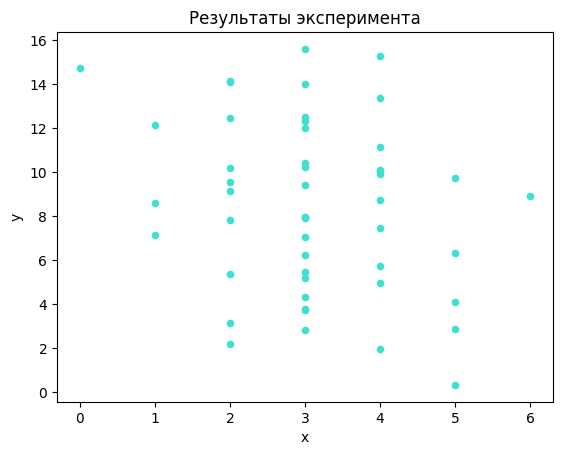

In [174]:
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
import scipy.stats as sps

def linear_regression(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

params, covariance = curve_fit(linear_regression, x, y)
b_0, b_1 = params

print("beta0 - ",round(b_0, 2))
print("beta1 - ",round(b_1, 2))

figure = plot.figure()
axes = figure.add_subplot(111)

plot.xlabel('x')
plot.ylabel('y')
plot.title('Результаты эксперимента')
axes.set_facecolor('white')

plot.scatter(x, y, s=20, color='turquoise', label="Данные")



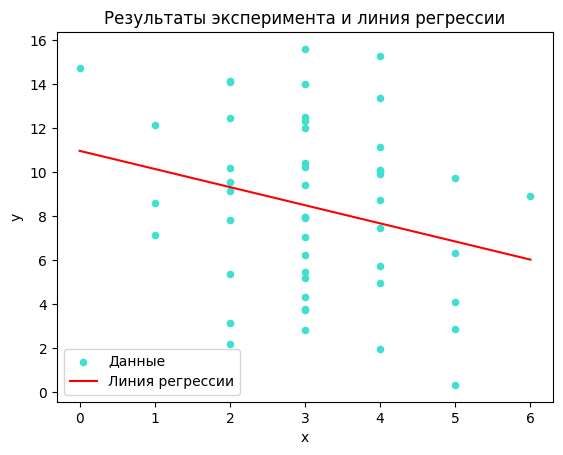

In [175]:
plot.scatter(x, y, s=20, c='turquoise', label="Данные", )
plot.plot([0,6], [b_0, b_0 + b_1 * 6], color = 'red', label = "Линия регрессии")
plot.xlabel("x")
plot.ylabel("y")
plot.title("Результаты эксперимента и линия регрессии")
plot.legend()
plot.show()

$y \approx 10.97 - 0.82 \cdot x$

- 2.Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии -  14.48


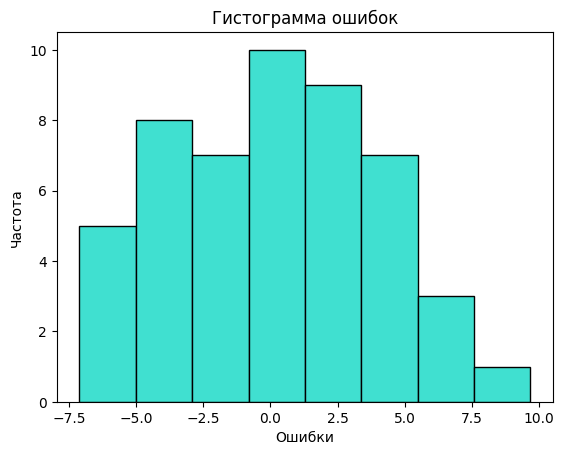

In [176]:
y_matrix = numpy.matrix(y).T
x_matrix = numpy.matrix([[1] * len(x), x])
b_matrix = numpy.linalg.inv(x_matrix * x_matrix.T) * x_matrix * y_matrix

unbiased_variance = round(numpy.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2/(len(x) - numpy.linalg.matrix_rank(x_matrix)),2)

print("Несмещённая оценка дисперсии - ", unbiased_variance)

errors = y_matrix - x_matrix.T * b_matrix
hist_bins = numpy.arange(min(errors), max(errors) + h, h)

plot.hist(errors, bins=hist_bins, edgecolor='black', color="turquoise")
plot.xlabel("Ошибки")
plot.ylabel("Частота")
plot.title("Гистограмма ошибок")
plot.show()

In [177]:
mean_errors = 0
std_errors = numpy.sqrt(unbiased_variance)
intervals = [[-7.12, -2.92], [-2.92, 1.28], [1.28, 5.48], [5.48, 9.68]]
freq_exp = [0] * len(intervals)
freq_teor = [0] * len(intervals)

print("x          | Частота | Гипотетическая частота")
for i in range(len(intervals)):
    num_1 = intervals[i][0]
    num_2 = intervals[i][-1]
    freq_exp[i] += len([x for x in errors if (x >= num_1 and x < num_1)])
    freq_teor[i] += len(errors) * (sps.norm.cdf(num_2, loc=mean_errors, scale=std_errors) - sps.norm.cdf(num_1, loc=mean_errors, scale=std_errors))
    if i == len(intervals) - 1:
        freq_teor[i] += len(errors) * sps.norm.sf(num_2, loc=mean_errors, scale=std_errors)
        print('[', round(num_1, 1), ", +inf)\t", freq_exp[i], "\t", freq_teor[i])
    else:
        print('[', round(num_1, 1), ',', round(num_2, 1), "]\t", freq_exp[i], "\t", freq_teor[i])

freq_exp = numpy.array(freq_exp)
freq_teor = numpy.array(freq_teor)
chi_2 = numpy.sum((freq_exp - freq_teor) ** 2 / freq_teor)

print("\nx^2 -", round(chi_2,2))
print("x_a -", round(sps.chi2.ppf(1 - alpha, df=len(freq_exp) - 1),2))


x          | Частота | Гипотетическая частота
[ -7.1 , -2.9 ]	 0 	 9.538403263127314
[ -2.9 , 1.3 ]	 0 	 20.51362339427668
[ 1.3 , 5.5 ]	 0 	 14.668780936180125
[ 5.5 , +inf)	 0 	 3.7458926698636352

x^2 - 48.47
x_a - 11.34



${\chi}^2 \approx 48.47$
<br>
$x_{\alpha} \approx 11.34$

$\chi^2 > x_{\alpha}$ -  гипотеза о нормальности отвергается

In [178]:
print("Статистика критерия Колмогорова -", round(sps.kstest([num[0,0] for num in errors], "norm", args = (mean_errors,std_errors)).statistic,4))
print("x_a -", round(sps.kstwobign.ppf(1 - alpha) / numpy.sqrt(len(errors)),4))

Статистика критерия Колмогорова - 0.077
x_a - 0.2302


$D_n \approx 0.0777$

$x_a \approx 0.2302$

$D_n < x_a$ - гипотеза о нормальности принимается

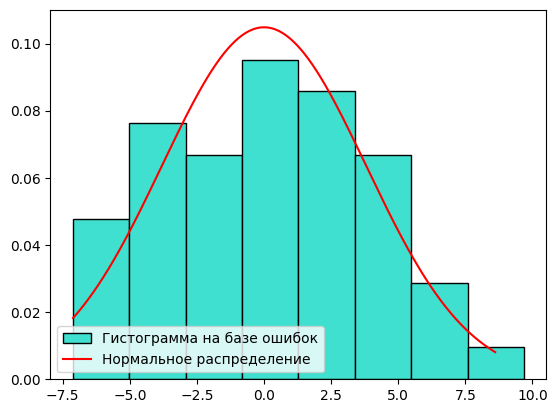

In [179]:
plot.figure()

plot.hist(errors, bins=hist_bins, edgecolor='black', density=True, label='Гистограмма на базе ошибок', color="turquoise")

plot.plot(numpy.arange(min(errors), max(errors) + 1, 0.01), sps.norm.pdf(numpy.arange(min(errors), max(errors) + 1, 0.01), mean_errors, std_errors), c = 'red', label='Нормальное распределение')

plot.legend()
plot.show()


- 3.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

Доверительный интервал для параметра $\beta_0$:

$\psi = C^\intercal \beta = \beta_0$

$C = (1, 0)^\intercal$

$\hat{\psi} = \hat{\beta}_0$

$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [180]:
r = numpy.linalg.matrix_rank(x_matrix)

n = len(x)

x_a = sps.t.ppf(1 - alpha/2, df = n - r)

C = numpy.matrix([[1], [0]])

b = float(C.T * numpy.linalg.inv(x_matrix * x_matrix.T) * C)

print("x_a -", x_a)
print("[", round(b_0 - x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2), ",", round(b_0 + x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2), "]", sep='')

x_a - 2.6822040269502136
[6.93,15.0]


$\left[6.93, 15.\right] \ni \beta_0$

Доверительный интервал для параметра $\beta_1$:

$\psi = C^\intercal \beta = \beta_1$

$C = (0, 1)^\intercal$

$\hat{\psi} = \hat{\beta}_1$

$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [181]:
r = numpy.linalg.matrix_rank(x_matrix)

n = len(x)

x_a = sps.t.ppf(1 - alpha/2, df = n - r)

C = numpy.matrix([[0], [1]])

b = float(C.T * numpy.linalg.inv(x_matrix * x_matrix.T) * C)
print("x_a -", x_a)
print("[", round(b_1 - x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2), ",", round(b_1 + x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2), "]", sep='')

x_a - 2.6822040269502136
[-2.04,0.39]


$\left[-2.04, 0.39\right] \ni \beta_1$

Доверительный эллипс для параметра $(\beta_0, \beta_1)$:

$\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$

$C = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}$

$\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$

$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$


In [182]:
import numpy as numpy
import sympy as sympy

r = numpy.linalg.matrix_rank(x_matrix)
n = len(x)
q = len(b_matrix)
x_alpha = sps.f.ppf(1 - alpha, dfn = q, dfd = n - r)
C = numpy.matrix([[1, 0], [0, 1]])
b_psi = C.T * numpy.linalg.inv(x_matrix * x_matrix.T) * C

x_symbol = sympy.Symbol('x', real=True)
y_symbol = sympy.Symbol('y', real=True)
x_vec = numpy.matrix([[x_symbol], [y_symbol]])
expr = (x_vec - b_matrix).T * numpy.linalg.inv(b_psi) * (x_vec - b_matrix)
expr = expr[0,0].as_poly().as_expr() - q * unbiased_variance * x_alpha
angle = numpy.arctan(float(expr.as_poly().coeff_monomial(x_symbol*y_symbol)
      /(expr.as_poly().coeff_monomial(x_symbol**2) - expr.as_poly().coeff_monomial(y_symbol**2)))) / 2
x_2_symbol = sympy.Symbol("x'", real=True)
y_2_symbol = sympy.Symbol("y'", real=True)
expr = expr.subs([(x_symbol, x_2_symbol * numpy.cos(angle) - y_2_symbol * numpy.sin(angle)), (y_symbol, x_2_symbol * numpy.sin(angle) + y_2_symbol * numpy.cos(angle))])
expr = expr.as_poly().as_expr()
small_numbers = set([e for e in expr.atoms(sympy.Number) if abs(e) < 1e-05])
d = {s: 0 for s in small_numbers}
expr = expr.subs(d)
A = expr.as_poly().coeff_monomial(x_2_symbol**2)
B = expr.as_poly().coeff_monomial(x_2_symbol)
C = expr.as_poly().coeff_monomial(y_2_symbol**2)
D = expr.as_poly().coeff_monomial(y_2_symbol)
E = expr.as_poly().coeff_monomial(1)
F = E - B**2/A/4 - D**2/C/4
x_3_symbol = sympy.Symbol("x''", real=True)
y_3_symbol = sympy.Symbol("y''", real=True)
expr = A * x_3_symbol**2 + C * y_3_symbol**2 + F
expr = expr / (-F) + 1
print(f"Неравенства -{expr} <= 1")
A = expr.as_poly().coeff_monomial(x_3_symbol**2)
C = expr.as_poly().coeff_monomial(y_3_symbol**2)
print(f"Длины полуосей - {round(numpy.sqrt(float(1/A)), 2)} и {round(numpy.sqrt(float(1/C)), 2)}")

Неравенства -0.0402911292394536*x''**2 + 4.04758295885209*y''**2 <= 1
Длины полуосей - 4.98 и 0.5


Длины полуосей: -4.98 и 0.5

- 4.Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости
$H_0 : \psi = 0$ - основная гипотеза

In [183]:
b_0_h = sum(y)/len(y)
b_1_h = 0

print("Оценка при выполнении гипотезы - (", b_0_h,",", b_1_h,")", sep='')
matrix = numpy.matrix([[b_0_h],[b_1_h]])
statistic_F = (numpy.linalg.norm(y_matrix - x_matrix.T * matrix)**2 - numpy.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2)/2/unbiased_variance
print("F -", round(statistic_F,2))
print("x_a -", round(sps.f.ppf(1 - alpha, dfn = 2, dfd = n - r),2))

Оценка при выполнении гипотезы - (8.409600000000001,0)
F - 1.66
x_a - 5.08


ㅤ
$\mathbb{F} \approx 1.66$

$x_{\alpha} \approx 5.08$

$\mathbb{F} < x_{\alpha}$ -гипотеза о независимости принимается

- 5.Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

ㅤ
$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon$

b_0:  11.56
b_1:  -1.28
b_2:  0.07


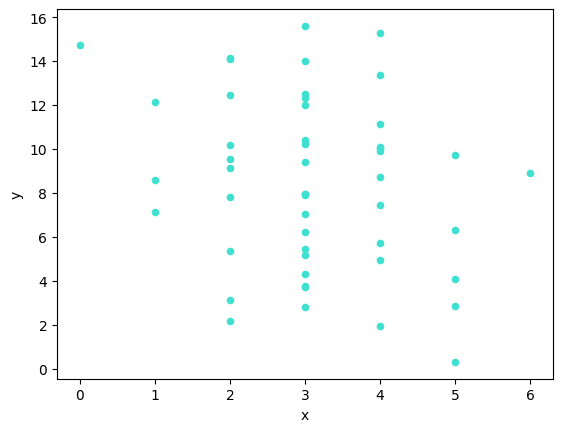

In [184]:
def linear_regression2(x, beta_0, beta_1, beta_2):
    return beta_0 + beta_1 * x + beta_2*(x**2)

params, covariance = curve_fit(linear_regression2, x, y)
beta_0, beta_1, beta_2 = params

print("b_0: ",round(beta_0,2))
print("b_1: ",round(beta_1,2))
print("b_2: ",round(beta_2,2))

plot.scatter(x, y, s=20, c='turquoise')
plot.xlabel("x")
plot.ylabel("y")
plot.show()

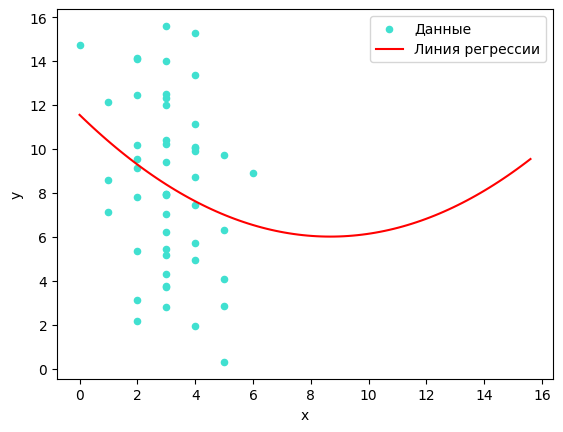

In [185]:
plot.scatter(x, y, s=20, c='turquoise', label="Данные")

x_range = numpy.linspace(min(x), max(y), 100)
plot.plot(x_range, linear_regression2(x_range, beta_0, beta_1, beta_2), color='red', label="Линия регрессии")
plot.xlabel("x")
plot.ylabel("y")
plot.legend()
plot.show()

Линейная регрессионная модель будет иметь вид:
$Y \approx 11.55 - 1.27 \cdot X + 0.07 \cdot X^2$
Линейная модель не отражает реальные данные

- 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [186]:
y_matrix = numpy.matrix(y).T
x_matrix = numpy.matrix([[1] * len(x), x, [x**2 for x in x]])
b_matrix = numpy.linalg.inv(x_matrix * x_matrix.T) * x_matrix * y_matrix

unbiased_variance  = numpy.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2/(len(x) - numpy.linalg.matrix_rank(x_matrix))

print("Несмещённая оценка дисперсии:", round(unbiased_variance,2))

Несмещённая оценка дисперсии: 14.76


Интервал 1: [-7.10:-5.00], Частота: 5
Интервал 2: [-5.00:-2.90], Частота: 9
Интервал 3: [-2.90:-0.80], Частота: 6
Интервал 4: [-0.80:1.30], Частота: 10
Интервал 5: [1.30:3.40], Частота: 10
Интервал 6: [3.40:5.50], Частота: 6
Интервал 7: [5.50:7.60], Частота: 3
Интервал 8: [7.60:9.70], Частота: 1
50


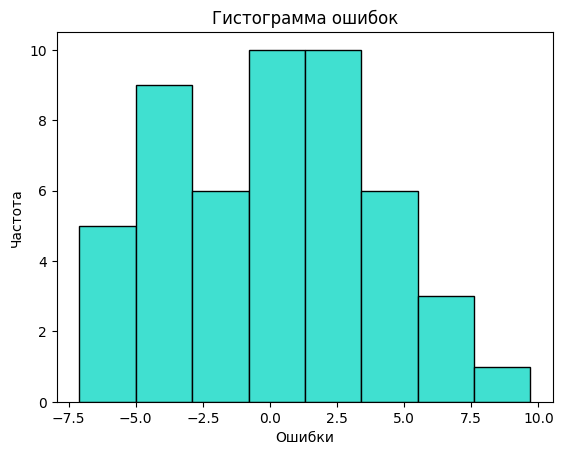

In [187]:
errors = y_matrix - x_matrix.T * b_matrix

hist_bins = numpy.arange(min(errors), max(errors) + h, h)

hist_values, hist_edges = numpy.histogram(errors, bins=hist_bins)

for i in range(len(hist_values)):
    print(f"Интервал {i + 1}: [{hist_edges[i]:.2f}:{hist_edges[i + 1]:.2f}], Частота: {hist_values[i]}")
print(sum(hist_values))

plot.hist(errors, bins=hist_bins, edgecolor='black', color="turquoise")
plot.xlabel("Ошибки")
plot.ylabel("Частота")
plot.title("Гистограмма ошибок")
plot.show()

In [188]:
mean_errors = 0
sqrt_errors = numpy.sqrt(unbiased_variance)

intervals = [[-7.1, -2.9], [-2.9, 1.3], [1.3, 5.5], [5.5, 9.7]]

freq_exp = [0] * len(intervals)
freq_teor = [0] * len(intervals)

print("x          | Частота | Гипотетическая частота")
for i in range(len(intervals)):
    num_1 = intervals[i][0]
    num_2 = intervals[i][-1]
    freq_exp[i] += len([x for x in errors if (x >= num_1 and x < num_1)])
    freq_teor[i] += len(errors) * (sps.norm.cdf(num_2, loc=mean_errors, scale=std_errors) - sps.norm.cdf(num_1, loc=mean_errors, scale=std_errors))
    if i == len(intervals) - 1:
        freq_teor[i] += len(errors) * sps.norm.sf(num_2, loc=mean_errors, scale=std_errors)
        print('[', round(num_1, 1), ", +inf)\t", freq_exp[i], "\t", freq_teor[i])
    else:
        print('[', round(num_1, 1), ',', round(num_2, 1), "]\t", freq_exp[i], "\t", freq_teor[i])

freq_exp = numpy.array(freq_exp)
freq_teor = numpy.array(freq_teor)
chi_2 = numpy.sum((freq_exp - freq_teor) ** 2 / freq_teor)

print("\nx^2 -", round(chi_2,2))
print("x_a -", round(sps.chi2.ppf(1 - alpha, df=len(freq_exp) - 1),2))

x          | Частота | Гипотетическая частота
[ -7.1 , -2.9 ]	 0 	 9.598363278392348
[ -2.9 , 1.3 ]	 0 	 20.53434939755507
[ 1.3 , 5.5 ]	 0 	 14.60682419219469
[ 5.5 , +inf)	 0 	 3.7088642957116793

x^2 - 48.45
x_a - 11.34


${\chi}^2 \approx 48.45$
<br>
$x_{\alpha} \approx 11.34$

$\chi^2 > x_{\alpha}$ - гипотеза о нормальности отвергается

In [189]:
print("Статистика критерия Колмогорова:", round(sps.kstest([num[0,0] for num in errors], "norm", args = (mean_errors,std_errors)).statistic,4))
print("x_a:", round(sps.kstwobign.ppf(1 - alpha) / numpy.sqrt(len(errors)),4))

Статистика критерия Колмогорова: 0.0825
x_a: 0.2302


$D_n \approx 0.025$
<br>
$x_a \approx 0.2302$

$D_n < x_a$ - гипотеза о нормальности принимается

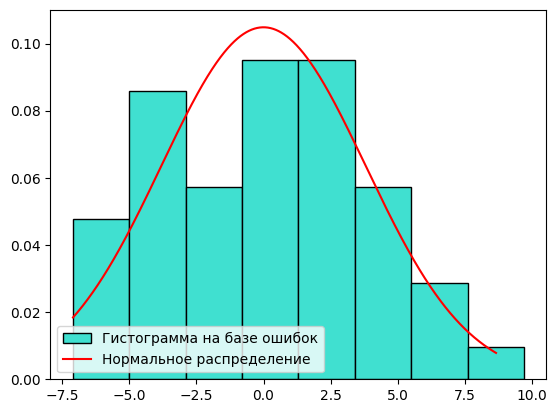

In [190]:
plot.figure()

hist_values, hist_edges = numpy.histogram(errors, bins=hist_bins)

plot.hist(errors, bins=hist_bins, edgecolor='black', density=True, label='Гистограмма на базе ошибок', color="turquoise")

plot.plot(numpy.arange(min(errors), max(errors) + 1, 0.01), sps.norm.pdf(numpy.arange(min(errors), max(errors) + 1, 0.01), mean_errors, std_errors), c = 'red', label='Нормальное распределение')

plot.legend()
plot.show()

- 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

Доверительный интервал для параметра $\beta_0$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
$C = (1, 0, 0)^\intercal$
$\psi = C^\intercal \beta = \beta_0$

In [191]:
r = numpy.linalg.matrix_rank(x_matrix)
n = len(x)
x_a = sps.t.ppf(1 - alpha/2, df = n - r)
C = numpy.matrix([[1], [0], [0]])
b = float(C.T * numpy.linalg.inv(x_matrix * x_matrix.T) * C)
print("x_a = ", x_a)
print("[",round(beta_0 - x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2),",",round(beta_0 + x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2),"]", sep='')

x_a =  2.6845556178665215
[4.53,18.58]


$\left[4.53, 18.58\right] \ni \beta_0$

Доверительный интервал для параметра $\beta_1$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
$C = (0, 1, 0)^\intercal$
$\psi = C^\intercal \beta = \beta_1$

In [192]:
r = numpy.linalg.matrix_rank(x_matrix)
n = len(x)
x_a = sps.t.ppf(1 - alpha/2, df = n - r)
C = numpy.matrix([[0], [1], [0]])
b = float(C.T * numpy.linalg.inv(x_matrix * x_matrix.T) * C)
print("x_a = ", x_a)
print("[",round(beta_1 - x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2),",",round(beta_1 + x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2),"]", sep='')

x_a =  2.6845556178665215
[-5.83,3.28]


$\left[-5.83, 3.28\right] \ni \beta_1$

Доверительный интервал для параметра $\beta_2$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
$C = (0, 0, 1)^\intercal$
$\psi = C^\intercal \beta = \beta_2$

In [193]:
r = numpy.linalg.matrix_rank(x_matrix)
n = len(x)
x_a = sps.t.ppf(1 - alpha/2, df = n - r)
C = numpy.matrix([[0], [0], [1]])
b = float(C.T * numpy.linalg.inv(x_matrix * x_matrix.T) * C)
print("x_a = ", x_a)
print("[",round(beta_2 - x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2),",",round(beta_2 + x_a * numpy.sqrt(unbiased_variance) * numpy.sqrt(b),2),"]", sep='')

x_a =  2.6845556178665215
[-0.64,0.79]


$\left[-0.64, .79\right] \ni \beta_2$

Доверительный эллипсоид для параметра $(\beta_0, \beta_1, \beta_2)$:

$\psi = C^\intercal \beta = (\beta_0, \beta_1, \beta_2)^\intercal$

$C = \begin{pmatrix}1 & 0 & 0\\0 & 1 &0 \\ 0&0&1 \end{pmatrix}$

$\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1,\hat{\beta}_2)^\intercal$

$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [194]:
r = numpy.linalg.matrix_rank(x_matrix)
n = len(x)
q = len(b_matrix)
x_alpha = sps.f.ppf(1 - alpha, dfn = q, dfd = n - r)
C = numpy.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
b_psi = C.T * numpy.linalg.inv(x_matrix * x_matrix.T) * C

x_symbol = sympy.Symbol('x', real=True)
y_symbol = sympy.Symbol('y', real=True)
z_symbol = sympy.Symbol('z', real=True)

x_vec = numpy.matrix([[x_symbol], [y_symbol], [z_symbol]])
expr = (x_vec - b_matrix).T * numpy.linalg.inv(b_psi) * (x_vec - b_matrix)
expr = expr[0,0].as_poly().as_expr() - q * unbiased_variance * x_alpha
x_2_symbol = sympy.Symbol("x'", real=True)
y_2_symbol = sympy.Symbol("y'", real=True)
z_2_symbol = sympy.Symbol("z'", real=True)
ev, _ = numpy.linalg.eig(numpy.linalg.inv(b_psi))
koef = ev / (x_alpha * q * unbiased_variance)
expr = koef[0]*x_2_symbol**2+koef[1]*y_2_symbol**2+koef[2]*z_2_symbol**2
print(f"Итоговый вид неравенства: {expr} <= 1")
print(f"Длины полуосей: {round(numpy.sqrt(1/koef[0]))}, {round(numpy.sqrt(1/koef[1]))} и {round(numpy.sqrt(1/koef[2]))}")

Итоговый вид неравенства: 50.6801822442779*x'**2 + 0.008301074796621*y'**2 + 0.266570787631457*z'**2 <= 1
Длины полуосей: 0, 11 и 2


- 8.Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить ее значимость на уровне $\alpha$.
$H_0 : \psi = 0$ - основная гипотеза

In [195]:
q = len(b_matrix)
x_h_matrix = numpy.matrix([[1] * len(x), x])

h_b_matrix = numpy.linalg.inv(x_h_matrix * x_h_matrix.T) * x_h_matrix * y_matrix

h_b0 = float(h_b_matrix[0])
h_b1 = float(h_b_matrix[1])
h_b2 = 0

h_b_matrix = numpy.matrix([[h_b0], [h_b1], [h_b2]])

print("Оценка при выполнении гипотезы: (",round(h_b0,2),',',round(h_b1,2),',',round(h_b2,2),')', sep='')
statistic_F = (numpy.linalg.norm(y_matrix - x_matrix.T * h_b_matrix)**2 - numpy.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2)/q/unbiased_variance
print("F =", round(statistic_F,2))
print("x_a =", round(sps.f.ppf(1 - alpha, dfn = q, dfd = n - r),2))

Оценка при выполнении гипотезы: (10.97,-0.82,0)
F = 0.03
x_a = 4.23


$\mathbb{F} \approx 0.03$

$x_{\alpha} \approx 4.23$

$\mathbb{F} < x_{\alpha}$ - гипотеза о квадратичной регрессионной независимости принимается

## Выводы

В ходе лабораторной работы по линейной регрессии были рассмотрены основные принципы метода наименьших квадратов (МНК) и изучены статистические свойства МНК-оценок, функции регрессии, а также роль МНК в регрессионном анализе. При построении моделей были использованы графики, на которых заметно, как различные прямые описывают выборку. Оценки параметров были проведены с применением доверительных интервалов и эллипсоидов. В ходе рассмотрения гипотез были приняты предположения о нормальности ошибок и линейной независимости Y от X, в то время как гипотезы о нормальности ошибок по Колмогорову были отвергнуты. Полученные результаты позволили сделать выводы о нормальности вектора ошибок и характере взаимосвязи в данных.